In [16]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = 'datasets/housing'
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'

### Download Data from Remote Server ###

In [17]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    #print(housing_url + ': ' + tgz_path)
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

### Load Data ###

In [19]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)   

housing = load_housing_data()

### Explore Data ###

In [20]:
housing.shape

(20640, 10)

In [21]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [29]:
housing['ocean_proximity'].unique()
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Plot histogram of attributes ###

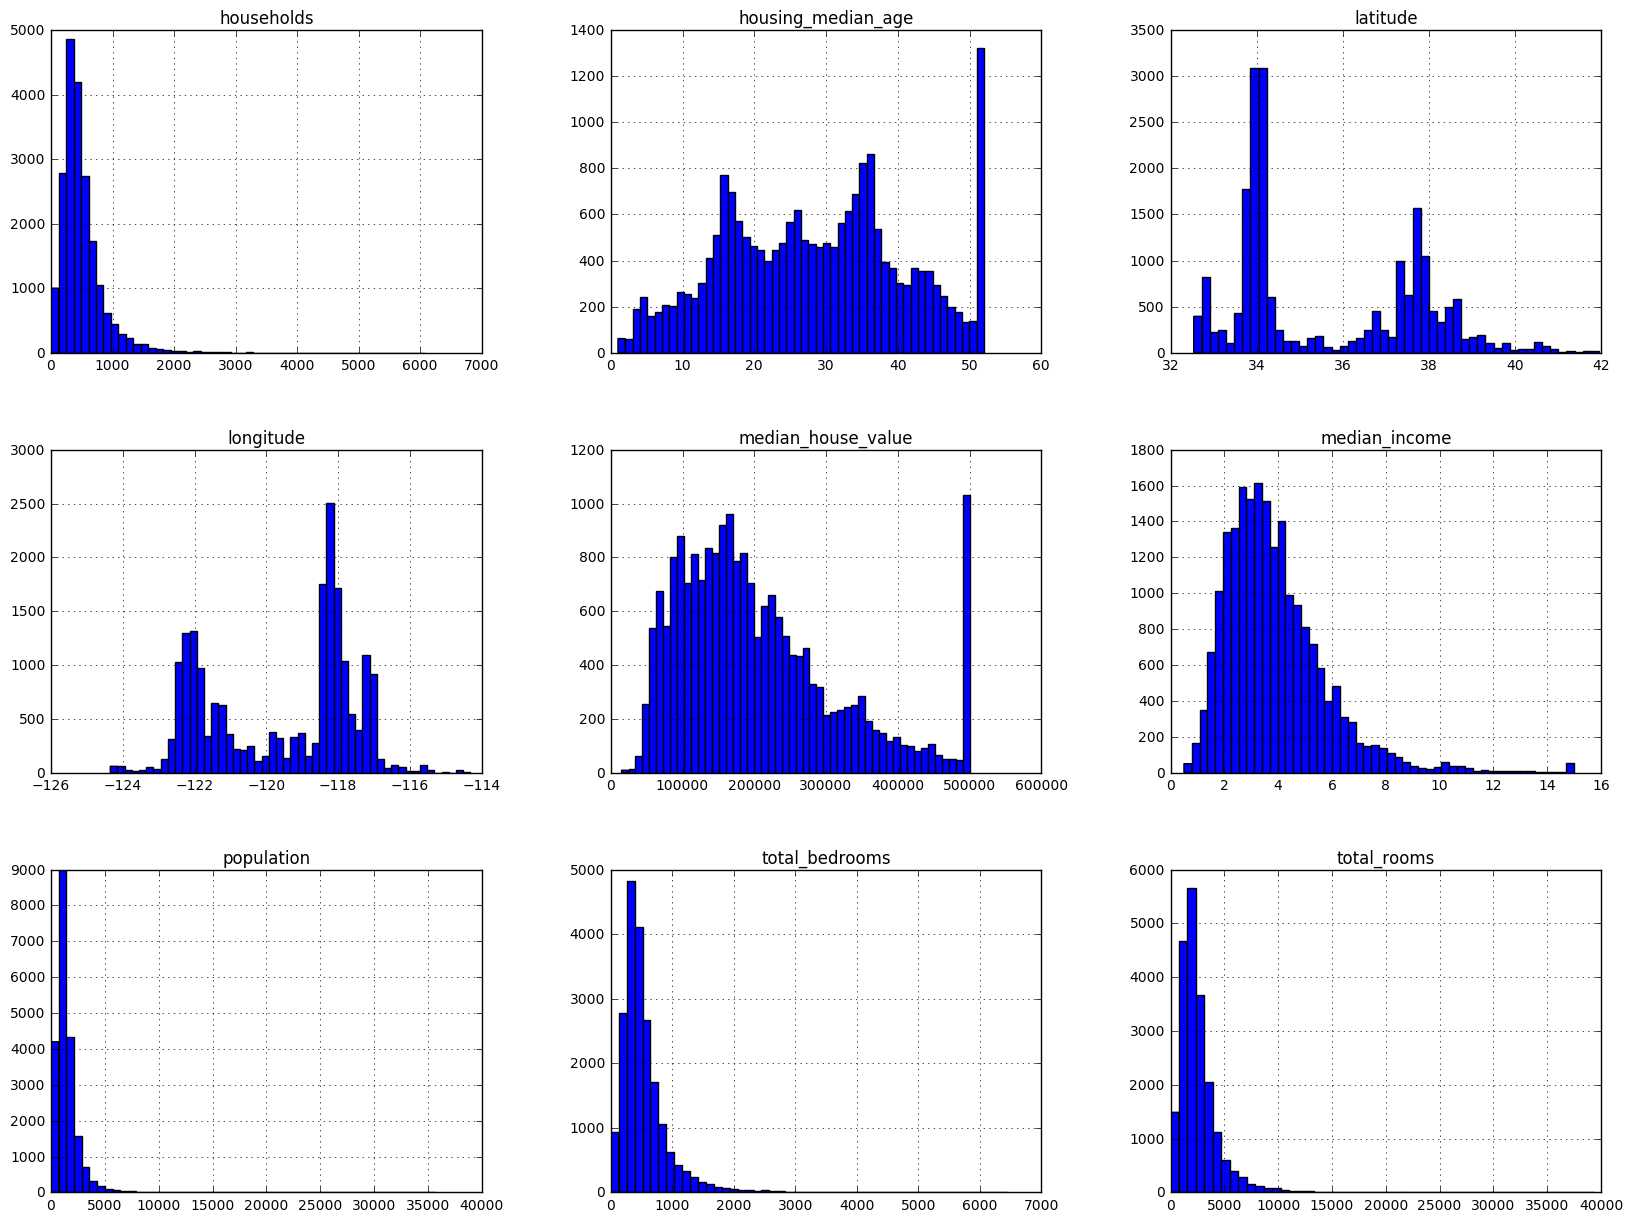

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Create index ###

In [90]:
housing.index.values
housing_1 = housing.reset_index()
housing_1['index'] = housing['longitude']*1000 + housing['latitude']
housing_1.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122192.12,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122182.14,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122202.15,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122212.15,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122212.15,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [123]:
import hashlib
import numpy as np
def_hash_fn = hashlib.md5
def test_or_train(id, test_ratio, hash_fn=def_hash_fn):
    return ord(hash_fn(np.int64(id)).digest()[-1]) < (256 * test_ratio)

In [117]:
lng = -122.23*1000
lat = 37.88
ind = lng+lat
print(np.int64(ind))
hv = def_hash_fn(np.int64(ind)).digest()
hv
bar = 256*.9
print(ord(hv[-1]))
print(256*.9)
print(ord(hv[-1]) < bar)

-122192
229
230.4
True


### Create train and test set ###

In [143]:
ids = housing_1['index']
test_or_train_check = ids.apply(lambda id: test_or_train(id, .2, hashlib.md5))
#print(len(np.nonzero(test_or_train_check)[0]))
#print(np.sum(test_or_train_check))
print('train_size: ' + str((~test_or_train_check).sum()) + ", test_size: " + str(test_or_train_check.sum()))
train_set, test_set = housing_1.loc[~test_or_train_check], housing_1.loc[test_or_train_check]
print('train_size: ' + str(len(train_set)) + ", test_size: " + str(len(test_set)))
train_set[['median_income','median_house_value']].describe()

train_size: 16267, test_size: 4373
train_size: 16267, test_size: 4373


,median_income,median_house_value
count,16267.000000,16267.000000
mean,3.845529,205902.512203
std,1.897243,115699.564560
min,0.499900,14999.000000
25%,2.553900,118800.000000
50%,3.512500,177400.000000
75%,4.703250,264000.000000
max,15.000100,500001.000000


In [167]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=.2, random_state=42)
print('train_size: ' + str(len(train_set)) + ", test_size: " + str(len(test_set)))
train_set[['median_income','median_house_value']].describe()

train_size: 16512, test_size: 4128


,median_income,median_house_value
count,16512.000000,16512.000000
mean,3.880754,207194.693738
std,1.904294,115622.626448
min,0.499900,14999.000000
25%,2.566700,119800.000000
50%,3.545800,179850.000000
75%,4.773175,265125.000000
max,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bde1160>]], dtype=object)

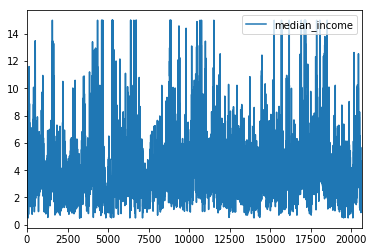

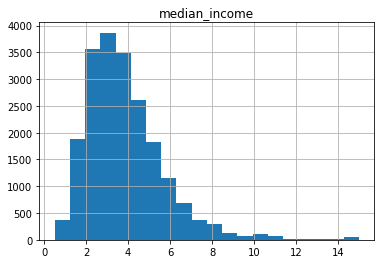

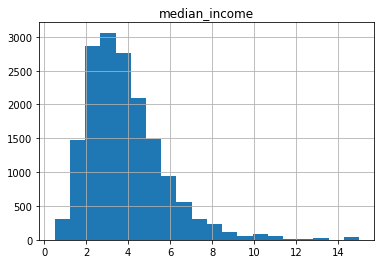

In [180]:
housing[['median_income']].plot()
housing[['median_income']].hist(bins=20)
train_set[['median_income']].hist(bins=20)

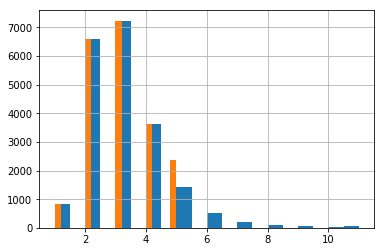

In [197]:
income_cat = np.ceil(housing['median_income']/1.5)
income_cat.hist(bins=20)
income_cat_capped = income_cat.copy()

income_cat_capped.where(income_cat_capped < 5, 5.0, inplace=True)
income_cat_capped.describe()
income_cat_capped.hist(bins=20)

In [183]:
housing[['median_income']].head()

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
